In this notebook, we:
- try different visualizations for multiple pareto-frontiers
- perform analyses (and significance tests if any)
- investing methods to find "winning" systems

In [17]:
% matplotlib inline


from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from pareto_frontiers import get_plot_data, get_pareto_frontier

In [18]:
import os, glob

def get_results_files(results_directory, track, normalized=True):
    track_directory = os.path.join(results_directory, track)
    tsvs = os.listdir(track_directory)
    norm_tsvs = filter(lambda x: x.startswith("norm"), tsvs)
    regular_tsvs = filter(lambda x: not x.startswith("norm"), tsvs)
    results = [ r for r in (norm_tsvs if normalized else regular_tsvs) ]    
    only_push = [x for x in filter(lambda x: "only.push" in x, results)]
    only_pull = [x for x in filter(lambda x: "only.pull" in x, results)]
    push_pull = [x for x in filter(lambda x: "push.pull" in x, results)]
    
    return only_push, only_pull, push_pull        

In [19]:
only_push, only_pull, push_pull = get_results_files("new-results/", "ts14")

In [50]:
def load_gvp_file(gvp_file, topic):
    with open(gvp_file) as inf:
        lines = inf.readlines()
        tpclines = filter(lambda x: topic in x, lines)
        gain_pain_points = []
        for line in tpclines:
            r, t, g, p, old_gain, old_pain = line.strip().split('\t')
            gain_pain_points.append( (float(p), float(g),  r) )
        gain_pain_points.sort()
        #print( gain_pain_points)
    return gain_pain_points

def frontier_functions(frontiers):
    pass

def plot_multi_frontier(gvp_files):
    #TODO: also process frontier fractions
    if args.multiple_pareto_fronts:
        print (plot_title)
        multi_fronts.append( (frontier, plot_title) ) # the frontier and the param settings in the plot_title
    pass
    

def plot_single_frontier(gvp_file, results_folder, track, topic='AVG'):
    gvp_path = os.path.join(results_folder, track, gvp_file)
    gain_pain_points = load_gvp_file(gvp_path, topic)
    frontier = get_pareto_frontier(gain_pain_points)
    
    plot_title, plot_output_file = get_plot_data(gvp_file, track, os.path.join(results_folder, track))
    # print(plot_title, plot_output_file)

    if 'only.push' in plot_title:
        plot_title = plot_title.replace('.21600', '')                           

    # for the paper: TODO: remove later
    track, params = plot_title.split(':')
    params = params.split('; ')[:2]
    # params = params.replace('p', 'persistence')
    
    #plot_title = r'{}: All Systems'.format(track)    # USE FOR PAPER
    plot_title = r'{}: {}'.format(track, '; '.join(params))

    gvp_plot = plot_graph(gain_pain_points, 'go', plot_title, frontier, track)
    #gvp_plot.show()

    # pp = PdfPages(plot_output_file)
    # pp.savefig(gvp_plot)
    # pp.close()
    return gvp_plot
    
def plot_graph(points, colorcodes, title_text, frontier, track):
    #fig = plt.figure()
    plt.tick_params(labelsize=12)
    plot_x, plot_y, rnames = zip(*points)

    plt.plot(plot_x, plot_y, colorcodes)
    plt.ylabel('Gain', fontsize=15)
    plt.xlabel('Pain', fontsize=15)
    plt.title(title_text, fontsize=18)

    fX, fY, fnames = zip(*frontier)
    plt.plot(fX, fY)
    for i, fname in enumerate(fnames):
        plt.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=12, verticalalignment='top')
    
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
    ax = plt.gca()

    if track == 'TS14':       
       pass

    if track == 'MB15':
        y_major_ticks = np.arange(0, .25, 0.05) 
        ax.set_yticks(y_major_ticks)        
    
    if track == 'RTS16':
        plt.xlim(0, 40)
        plt.ylim(0, ymax)
        y_major_ticks = np.arange(0, .180, 0.05) 
        ax.set_yticks(y_major_ticks)
        

    plt.grid(linestyle='dotted', linewidth='1')

    plt.tight_layout()
    #return fig

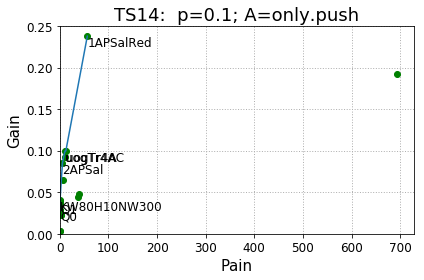

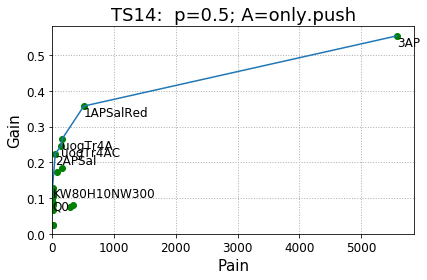

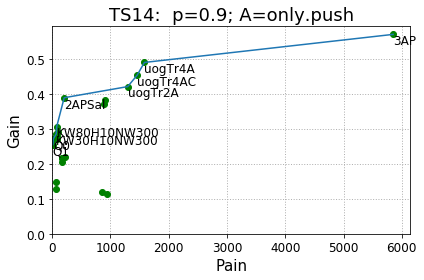

In [56]:
for c in range(3):
    plot_single_frontier(only_push[c], "new-results/", "ts14")

In [1]:
# %load pareto_frontiers.py
# script to plot avg(gain) vs avg(pain) for runs

import sys
import os
import argparse
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import defaultdict

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import numpy as np

def plot_graph(points, colorcodes, title_text, frontier):
    fig = plt.figure()
    #ax = fig.add_subplot(111)

    #plt.tight_layout()
    plt.tick_params(labelsize=12)

    plot_x, plot_y, rnames = zip(*points)

    plt.plot(plot_x, plot_y, colorcodes)
    plt.ylabel('Gain', fontsize=15)
    plt.xlabel('Pain', fontsize=15)
    plt.title(title_text, fontsize=18)

    fX, fY, fnames = zip(*frontier)
    plt.plot(fX, fY)
    for i, fname in enumerate(fnames):
        # if 'TS14' in title_text:
        #     if 'Q0' in fname:
        #         plt.annotate(fname.replace('input.', ''), fontsize=12, 
        #             xy=(fX[i], fY[i]), xycoords='data',
        #             xytext=(1000, 0.1), textcoords='data')
        #         continue        
        plt.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=12, verticalalignment='top')
    
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    plt.xlim(0, xmax)
    plt.ylim(0, ymax)
    
    ax = plt.gca()

    if track == 'TS14':       
       pass

    if track == 'MB15':
        y_major_ticks = np.arange(0, .25, 0.05) 
        ax.set_yticks(y_major_ticks)        
    
    if track == 'RTS16':
        plt.xlim(0, 40)
        plt.ylim(0, ymax)
        y_major_ticks = np.arange(0, .180, 0.05) 
        ax.set_yticks(y_major_ticks)
        

    plt.grid(linestyle='dotted', linewidth='1')


    plt.tight_layout()
    return fig


def plot_multiple_pareto_frontiers(multi_fronts, colorcodes):
    fig = plt.figure()
    
    plt.tick_params(labelsize=12)

    plt.ylabel('gain', fontsize=15)
    plt.xlabel('pain', fontsize=15)

    track = multi_fronts[0][1][:multi_fronts[0][1].index(': ')]

    plt.title( track + ": " + 'Pareto frontiers', fontsize=20)

    multi_fronts.sort(key=lambda x: int(x[1].split(';')[1].split('.')[2]))

    for frontier, paramstring in multi_fronts:
        fX, fY, fnames = zip(*frontier)
        paramstring = paramstring.replace(track +': ', '')
        p, A, L, V = paramstring.split(';')
        A = 'A=' + A.split('.')[-1]
        plt.plot(fX, fY, marker='o', label='; '.join([p,A]) )
        #plt.plot(fX, fY, colorcodes)
        for i, fname in enumerate(fnames):
            plt.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=12, verticalalignment='top')
    plt.legend(loc='lower right')
    plt.tight_layout()
    return fig


def draw_inset_plot(ax, inset_frontier, mode, track):
    zoom = 2
    if track == 'TS14':
        zoom = 1.25
    elif track == 'TS13':
        zoom = 1.75
    elif track == 'MB15':
        zoom = 3


    # ax_inset = zoomed_inset_axes(ax, zoom, loc=7)
    ax_inset = inset_axes(ax, width=1.95, height=1.95, loc=4, borderpad=1.5)


    frontier, paramstring = inset_frontier
            
    fX, fY, fnames = zip(*frontier)

    paramstring = paramstring.replace(track +': ', '')
    p, A, L, V = paramstring.split(';')
    A = 'A=' + A.split('.')[-1]
    legendlabel = '; '.join([p,A])

    if mode == 'only.push':
        legendlabel = p

    ax_inset.plot(fX, fY, marker='o', linestyle='solid', color='orange', label= legendlabel)

    for i, fname in enumerate(fnames):
        ax_inset.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=10, verticalalignment='top', color='orange')
    
    x1, x2, y1, y2 = 0, 0, 0, 0
    xstep, ystep = 0,0
    if track == 'RTS16':
        x1, x2, y1, y2 = 0, 3, 0, .05
        xstep = 1
        ystep = 0.1
    elif track == 'MB15':
        x1, x2, y1, y2 = 0, 8, 0, .05   
        xstep = 2
        ystep = 0.1
    elif track == 'TS14':
        x1, x2, y1, y2 = 0, 60, 0, .25
        xstep = 10
        ystep = .05
    elif track == 'TS13':
        x1, x2, y1, y2 = 0, 25, 0, 11
        xstep = 5
        ystep = 2
    
    print ( track, x1, x2, y1, y2 )

    ax_inset.set_xlim(x1, x2)
    ax_inset.set_ylim(y1, y2)
    ax_inset.set_xticks(np.arange(x1, x2+.1, xstep))
    #ax_inset.set_yticks(np.arange(y1, y2+.1, ystep))
    
    #ax_inset.plot([0, y2], [0, y2], c='blue', ls='dotted')


def make_paper_plots(multi_fronts, mode):

    fig = plt.figure()
    
    plt.tick_params(labelsize=12)

    plt.ylabel('Gain', fontsize=15)
    plt.xlabel('Pain', fontsize=15)

    track = multi_fronts[0][1][:multi_fronts[0][1].index(': ')]

    # plt.title( track + ": {} ".format(mode) + 'Pareto frontiers')
    plt.title( track + ": " + 'Pareto Frontiers', fontsize=18)
    
    multi_fronts.sort(key=lambda x: (float(x[1].split(';')[0].split('=')[1]), int(x[1].split(';')[1].split('.')[2])))

    colors = ['orange', 'green', 'black']
    linestyles = ['solid', 'dashed', 'dotted']
    if mode == 'only.push':
        linestyles = ['solid'] * 3

    
    lsi = 0
    for frontier, paramstring in multi_fronts:

        # print paramstring
        # print len(frontier)

                
        fX, fY, fnames = zip(*frontier)
        # print fnames

        paramstring = paramstring.replace(track +': ', '')
        p, A, L, V = paramstring.split(';')
        A = 'A=' + A.split('.')[-1]
        legendlabel = '; '.join([p,A])

        # if '300' in legendlabel and '0.9' in legendlabel:
        #     lsi += 1
        #     continue

        if mode == 'only.push':
            legendlabel = p

        plt.plot(fX, fY, marker='o', linestyle=linestyles[lsi%3], color=colors[ lsi%3 if mode == 'only.push' else lsi/3 ], label= legendlabel)

        for i, fname in enumerate(fnames):
            if lsi == 0:
                continue
            plt.text(fX[i], fY[i], fname.replace('input.', ''), fontsize=12, verticalalignment='top', color=colors[ lsi%3 if mode == 'only.push' else lsi/3 ])
            # print '{:.3f}\t{:.3f}\t{}\t{}'.format(fY[i], fX[i], fY[i] >= fX[i], fname)
        lsi += 1
    
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    if xmax > 250:
        plt.xlim( 0, 250 )

    ax = plt.gca()

    if track == 'TS14':
       plt.ylim( 0, .35 )
       plt.xlim( 0, 200 )
    
    if track == 'MB15':
        plt.ylim(0, 0.225)
        plt.xlim(0, 40)
        y_major_ticks = np.arange(0, .225, 0.05) 
        ax.set_yticks(y_major_ticks)
    
    if track == 'RTS16':
        plt.xlim(0, 40)
        plt.ylim(0, ymax)
        y_major_ticks = np.arange(0, .25, 0.05) 
        ax.set_yticks(y_major_ticks)
        
    plt.grid(linestyle='dotted', linewidth='1')

    # plt.plot([0, ymax-1e-8], [0, ymax], c='blue', ls='dotted')
    
    plt.legend(loc='upper left')

    

    ax = plt.gca()
    
    # ax_inset = inset_axes(ax, width='30%', height='30%', loc=4)
    draw_inset_plot(ax, multi_fronts[0], mode, track)
   
    
    plt.tight_layout()
    
    return fig

def get_pareto_frontier(points):
    # http://math.stackexchange.com/questions/101125/how-to-compute-the-pareto-frontier-intuitively-speaking/101141

    points.sort()
    frontier = [points[0]]
    for i in range(1, len(points)):
        if points[i][1] > frontier[-1][1]:
            frontier.append(points[i])
    return frontier

def get_plot_data(gvp_file_name, track, plot_out_path):
    param_str = os.path.splitext(os.path.basename(gvp_file_name))[0]
    plot_file_name = os.path.join(plot_out_path, param_str + '.pdf')

    param_str = param_str.replace("norm_","")

    param_str = param_str.replace('_gmp', '')
    param_str = param_str.replace('_', '; ')
    param_str = param_str.replace('-', '=')
    param_str = track.upper() + ': ' +  param_str
    return param_str, plot_file_name


if __name__ == '__main__':
    ap = argparse.ArgumentParser(description='computes and plots pareto frontiers')
    ap.add_argument('--plot_output_folder', help='will produce one plot per gain-vs-pain-input-file in plot_output_folder')
    ap.add_argument('track', choices=['ts13', 'ts14', 'mb15', 'rts16'])
    ap.add_argument('--topic', help='produce frontier for given topic', default='AVG')
    ap.add_argument('--multiple_pareto_fronts', help="output filename for plot with multiple pareto frontiers for various parameter settings")
    ap.add_argument("--mode", choices=['only.push', 'only.pull', 'push.pull'])
    ap.add_argument("--paper_plots", action="store_true", help="plots for the paper")
    ap.add_argument('gain_vs_pain_input_files', nargs='+')
    args = ap.parse_args()

    print (args)

    if args.paper_plots:
        args_error = False
        if not args.mode:
            print( 'ERROR: --mode needed with --paper_plots')
            args_error = True
        if args.mode == 'only.push' and len(args.gain_vs_pain_input_files) != 3:
            print ('ERROR: --mode only.push needs 3 gain_vs_pain_input_files {0.1 0.5 0.9}')
            args_error = True
        if args.mode in ['only.pull', 'push.pull'] and len(args.gain_vs_pain_input_files) != 9:
            print( 'ERROR: --mode {} needs 9 gain_vs_pain_input_files {0.1 0.5 0.9} x {5m, 1h, 6h}'.format(args.mode))
            args_error = True
        if args_error:
            sys.exit()
        args.gain_vs_pain_input_files.sort()


    frontier_fractions = {}

    multi_fronts = []

    for gvp_file in args.gain_vs_pain_input_files:


        with open(gvp_file) as inf:
            lines = inf.readlines()
            tpclines = filter(lambda x: args.topic in x, lines)

            gain_pain_points = []
            for line in tpclines:
                r, t, g, p, old_gain, old_pain = line.strip().split('\t')
                gain_pain_points.append( (float(p), float(g),  r) )

            gain_pain_points.sort()

            print( gain_pain_points)

            frontier = get_pareto_frontier(gain_pain_points)
            for p, g, run in frontier:
                print (p, g, run)
                if run not in frontier_fractions:
                    frontier_fractions[run] = [1, g, p, 1]
                else:
                    frontier_fractions[run][0] += 1
                    frontier_fractions[run][1] += g 
                    frontier_fractions[run][2] += p
                    frontier_fractions[run][3] += 1

            plot_title, plot_output_file = get_plot_data(gvp_file, args.track, args.plot_output_folder)

            if args.multiple_pareto_fronts:
                print (plot_title)
                multi_fronts.append( (frontier, plot_title) ) # the frontier and the param settings in the plot_title

            if args.plot_output_folder and not args.multiple_pareto_fronts:               
                
                print(plot_title)

                if 'only.push' in plot_title:
                    plot_title = plot_title.replace('.21600', '')                           

                # for the paper: TODO: remove later
                track, params = plot_title.split(':')
                # params = params.split(';')[:1][0].strip()
                # params = params.replace('p', 'persistence')
                plot_title = r'{}: All Systems'.format(track)
                print(plot_title)
                
                gvp_plot = plot_graph(gain_pain_points, 'go', plot_title, frontier)

                pp = PdfPages(plot_output_file)
                pp.savefig(gvp_plot)
                pp.close()

    if args.multiple_pareto_fronts:

        multi_front_plot = plot_multiple_pareto_frontiers(multi_fronts, 'go')
        if args.paper_plots:
            multi_front_plot = make_paper_plots(multi_fronts, args.mode)
        pp = PdfPages(os.path.join(args.plot_output_folder, args.multiple_pareto_fronts))
        pp.savefig(multi_front_plot)
        pp.close()

    num_param_sets = float(len(args.gain_vs_pain_input_files))
    front_avg = dict(map(lambda x: (x[0], [x[1][0]/num_param_sets, x[1][1]/x[1][3], x[1][2]/x[1][3]]), frontier_fractions.items()))

    print ('{}\t{}\t{}\t{}'.format('run', 'front_frac', 'avg_front_gain', 'avg_front_pain'))
    for run, data in sorted(front_avg.items(), key=lambda x: (-x[1][0], -x[1][1], x[1][2])):
        frontfrac, ave_g, ave_p = data
        print ('{}\t{:.3f}\t{:.3f}\t{:.3f}'.format(run, frontfrac, ave_g, ave_p))



usage: ipykernel_launcher.py [-h] [--plot_output_folder PLOT_OUTPUT_FOLDER]
                             [--topic TOPIC]
                             [--multiple_pareto_fronts MULTIPLE_PARETO_FRONTS]
                             [--mode {only.push,only.pull,push.pull}]
                             [--paper_plots]
                             {ts13,ts14,mb15,rts16} gain_vs_pain_input_files
                             [gain_vs_pain_input_files ...]
ipykernel_launcher.py: error: argument track: invalid choice: '/run/user/1000/jupyter/kernel-adcb32ca-9a76-405a-a6f5-75c9b7baf3ed.json' (choose from 'ts13', 'ts14', 'mb15', 'rts16')


SystemExit: 2

/home/gaurav/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
